In [1]:
# Matplotlib Dependicies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Pandas and NumPy Dependicies
import numpy as np
import pandas as pd

In [3]:
# Date & Time Dependicies
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
# Import SQLAlchemy Dependencies

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Connect to the SQLite database engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# Add the autobase function
Base = automap_base()

In [7]:
# Reflect an existing database into a new model
# Add code to reflect the schema from the tables to our code:
Base.prepare(engine, reflect=True)


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23) # this code specified the most recent date

# Calculate the date one year from the last date in data set.(August 23, 2016)
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Create a variable to store the results of the query
results = []

# Add the session created earlier so we can query the database
results = session.query(Measurement.date, Measurement.prcp)

# print results
print(results.all())


[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [12]:
# Since we only want to see the most recent data, we need to 
# Filter out all of the data that is older than a year from the last record date.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

In [13]:
# One last thing: we’ll add a function that extracts all of the results from our query and put them in a list
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [14]:
# Save data to a Python Pandas DataFrame ['data', 'preciption']

In [15]:
# How many stations are available in this dataset?
df = pd.DataFrame(results, columns=['date','precipitation']) 

In [16]:
# Next we manipulate the DataFrame using the set_index()Function
# We want the index to be the data column show first 10 rows
df.set_index(df['date'], inplace=True) # returns no copies
df.head(10)


,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
2016-08-28,2016-08-28,0.01
2016-08-29,2016-08-29,0.00
2016-08-30,2016-08-30,0.00
2016-08-31,2016-08-31,0.13


# Clean and Tidy Data

In [17]:
# Sort the df values
df = df.sort_index()

In [18]:
# We ended up with two date column, print dataframe without the index
# run the code again to print the sorted list without the index?
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

# Plot The Data

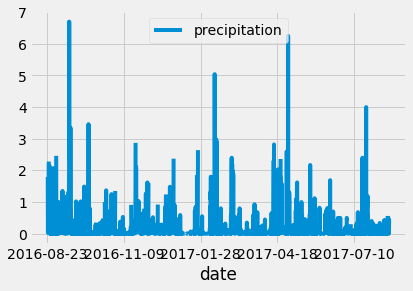

In [19]:
df.plot()

In [20]:
# Create a summary of the statistics
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Find the Number of Stations used to collect the informaion

In [21]:
# What are the most active stations?
session.query(func.count(Station.station))


In [22]:
# List the stations and to count the number stations precipitation data is collected from
session.query(func.count(Station.station)).all() # the .all()function returns a list

[(9)]

# Determine the most active stations

In [23]:
# Add a query to determine the active stations
session.query(Measurement.station, func.count(Measurement.station))

We want to group the data by the station name, and then order by the count for each station in descending order.

In [24]:
# Group data by station name
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station)

In [25]:
# Order in descending order and return all result of the query
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

# Find Low, High, and Average Temperatures

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))

In [27]:
# Add the most active station to your list
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

# Plot the Highest Number of Observations

We need to create a plot that shows all of the temperatures in a given year for the station with the highest number of temperature observations.

In [28]:
# Create a Query for the Temperature Observations, pull Measurement.tobs
session.query(Measurement.tobs)

In [29]:
# filter out all the stations except the most active station 
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

In [30]:
# Run the code
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

# Convert the Temperature Observation Results to a DataFrame

In [31]:
# convert the results to a DataFram
df = pd.DataFrame(results, columns=['tobs'])
df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


# Plot the Temperature Observations

- Create a Histogram to show the temperature observations
- A histogram is a graph made up of a range of data that is separated into different bins. 


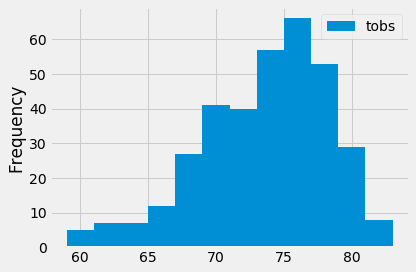

In [32]:
# Create 12 bins for the histogram,
# Compress th x-axis labels so they fit into he box holding our plot
df.plot.hist(bins=12)
plt.tight_layout()

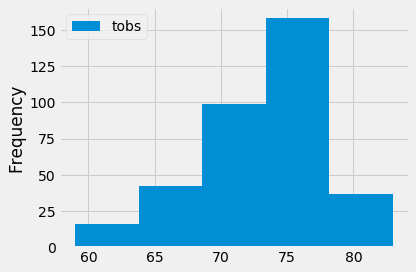

In [33]:
# Create 5 bins for the histogram,
# Compress th x-axis labels so they fit into he box holding our plot
df.plot.hist(bins=5)
plt.tight_layout()

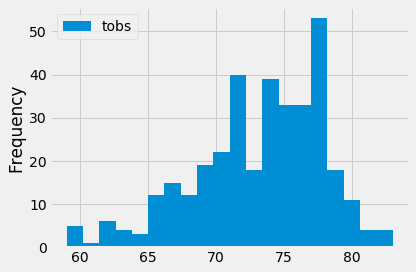

In [34]:
# Create 20 bins for the histogram,
# Compress th x-axis labels so they fit into he box holding our plot
df.plot.hist(bins=20)
plt.tight_layout()


In [35]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (calc_temps('2016-18-02', '2017-18-03'))
print(min_max_avg)


[(58.0, 87.0, 74.14387974230493)]


# Challenge

# Objectives
- The goals of this challenge are for you to:
- Determine key statistical data about the month of June.
- Determine key statistical data about the month of December.
- Compare your findings between the month of June and December.
- Make 2 or 3 recommendations for further analysis.
- Share your findings in the Jupyter Notebook.


# Determine key statistical data about the month of June
# Previous Year June 2016

In [36]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (calc_temps('2016-06-01', '2016-06-30'))
print(min_max_avg)

[(64.0, 81.0, 75.17525773195877)]


# Exploratory Climate Analysis

In [37]:
# Design a query to retrieve the month of precipitation data and plot the results. 
# Starting from the first data point in the database. 
june_1st = dt.date(2016, 6, 1)

# Calculate the date one month from the first date in data set.
june_30th = dt.date(2016, 6, 1) + dt.timedelta(days=30)

# Perform a query to retrieve the data and precipitation scores
# Create a variable to store the results of the query
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= june_1st).filter(Measurement.date <= june_30th).all()
# Save to Panda DataFrame

df = pd.DataFrame(results, columns=['date','precipitation'])
# Next we manipulate the DataFrame using the set_index()Function
# We want the index to be the data column 
df.set_index(df['date'], inplace=False)
# Sort the dataframe by date
df = df.sort_index()
df

,date,precipitation
0,2016-06-01,0.06
1,2016-06-02,0.00
2,2016-06-03,0.00
3,2016-06-04,0.00
4,2016-06-05,0.00
...,...,...
195,2016-06-26,0.70
196,2016-06-27,0.30
197,2016-06-28,0.25
198,2016-06-29,0.35


# Plot the precipition using style.use('fivethirtyeight')
# Month June 2016

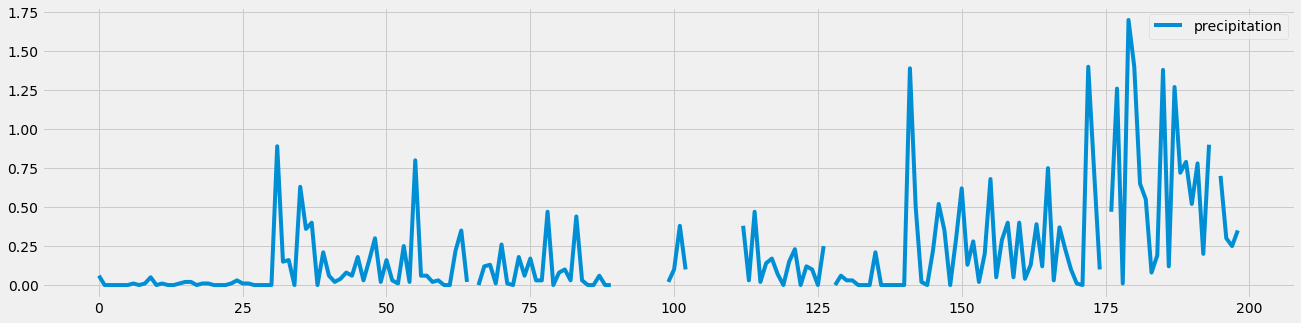

In [38]:
df.plot(figsize=(20,5))

In [39]:
# Statistical Data
df.describe()

,precipitation
count,177.000000
mean,0.207514
std,0.324999
min,0.000000
25%,0.010000
50%,0.060000
75%,0.260000
max,1.700000


# June 2017

In [40]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (calc_temps('2017-06-01', '2017-06-30'))
print(min_max_avg)

[(71.0, 83.0, 77.21989528795811)]


# Exploratory Climate Analysis

In [41]:
# Design a query to retrieve the month of precipitation data and plot the results. 
# Starting from the first data point in the database. 
june_1st = dt.date(2017, 6, 1)

# Calculate the date one month from the first date in data set.
june_30th = dt.date(2017, 6, 1) + dt.timedelta(days=30)

# Perform a query to retrieve the data and precipitation scores
# Create a variable to store the results of the query
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= june_1st).filter(Measurement.date <= june_30th).all()
# Save to Panda DataFrame

df = pd.DataFrame(results, columns=['date','precipitation'])
# Next we manipulate the DataFrame using the set_index()Function
# We want the index to be the data column 
df.set_index(df['date'], inplace=False)
# Sort the dataframe by date
df = df.sort_index()
df

,date,precipitation
0,2017-06-01,0.00
1,2017-06-02,0.00
2,2017-06-03,0.02
3,2017-06-04,0.00
4,2017-06-05,0.00
...,...,...
190,2017-06-27,0.10
191,2017-06-28,0.02
192,2017-06-29,0.04
193,2017-06-30,0.20


# Plot the precipition using style.use('fivethirtyeight')
# Month June 2017

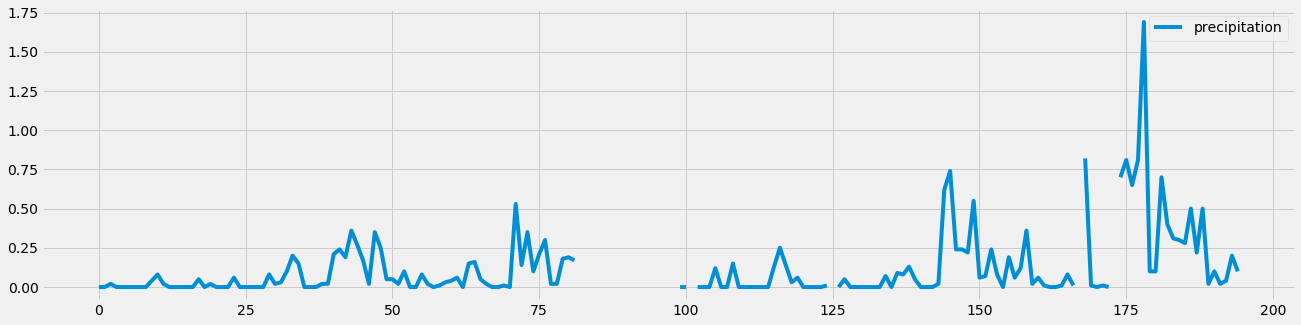

In [42]:
df.plot(figsize=(20,5))

In [43]:
# Statistical Data
df.describe()

,precipitation
count,175.000000
mean,0.118743
std,0.215414
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,1.690000


# Determine key statistical data about the month of December
# Previous Year December 2016

In [44]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (calc_temps('2016-12-01', '2016-12-31'))
print(min_max_avg)

[(60.0, 78.0, 71.13)]


# Exploratory Climate Analysis

In [45]:
# Design a query to retrieve the month of precipitation data and plot the results. 
# Starting from the first data point in the database. 
december_1st = dt.date(2016, 12, 1)

# Calculate the date one month from the first date in data set.
december_31st = dt.date(2016, 12, 1) + dt.timedelta(days=30)

# Perform a query to retrieve the data and precipitation scores
# Create a variable to store the results of the query
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= december_1st).filter(Measurement.date <= december_31st).all()
# Save to Panda DataFrame

df = pd.DataFrame(results, columns=['date','precipitation'])
# Next we manipulate the DataFrame using the set_index()Function
# We want the index to be the data column 
df.set_index(df['date'], inplace=False)
# Sort the dataframe by date
df = df.sort_index()
df

,date,precipitation
0,2016-12-01,0.12
1,2016-12-02,0.03
2,2016-12-03,0.00
3,2016-12-04,0.03
4,2016-12-05,0.43
...,...,...
195,2016-12-27,0.14
196,2016-12-28,0.14
197,2016-12-29,1.03
198,2016-12-30,2.37


# Plot the precipitation using style.use('fivethirtyeight')
# Month December 2016

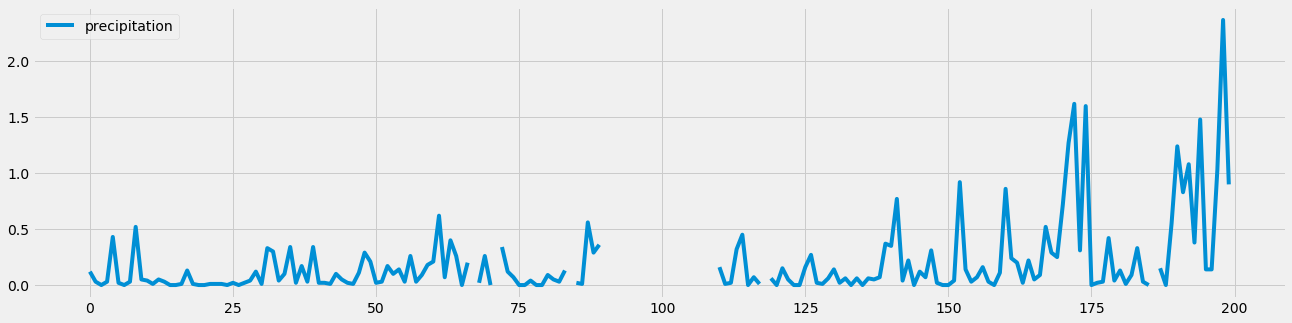

In [46]:
df.plot(figsize=(20,5))

In [47]:
# Statistical Data
df.describe()

,precipitation
count,178.000000
mean,0.199494
std,0.342967
min,0.000000
25%,0.020000
50%,0.060000
75%,0.247500
max,2.370000


# Month December 2017

In [48]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (calc_temps('2017-12-01', '2017-12-31'))
print(min_max_avg)

[(None, None, None)]


# Exploratory Climate Analysis

In [49]:
# Design a query to retrieve the month of precipitation data and plot the results. 
# Starting from the first data point in the database. 
december_1st = dt.date(2017, 12, 1)

# Calculate the date one month from the first date in data set.
december_31st = dt.date(2017, 12, 1) + dt.timedelta(days=30)

# Perform a query to retrieve the data and precipitation scores
# Create a variable to store the results of the query
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= december_1st).filter(Measurement.date <= december_31st).all()
# Save to Panda DataFrame

df = pd.DataFrame(results, columns=['date','precipitation'])
# Next we manipulate the DataFrame using the set_index()Function
# We want the index to be the data column 
df.set_index(df['date'], inplace=False)
# Sort the dataframe by date
df = df.sort_index()
df

,date,precipitation


In [50]:
# df.plot(figsize=(20,5))
# return "no numeric data"

In [51]:
df.describe()

,date,precipitation
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


# Investing in Waves and Ice Cream

Before W.Avy can invest into the Waves and Ice Cream venture he would like you to run an analysis
and gather information about seasonal data of Oahu to determine if the weather could affect
the Waves and Ice Cream shop.

When we ran the analysis we collected information about Oahu's seasional weather, we used 
key statistical data for the month of July 2016, July 2017, December 2016 and December 2017
We wrote a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
and return the minimum, average, and maximum temperatures for that range of dates for June 2016, June 2017, December 2016, and December 2017

# Exploratory Climate Analysis
- Design a query to retrieve the month of precipitation data and plot the results. Starting from the first data point in the database.

When we plot the precipitation using style.use('fivethirtyeight') we found the following results
- June 2016: Maximum precipition: 1.74 - Minimum precipition: 0.08
- June 2017: Maximum precipition: 1.74 - Minimum precipition: 0.00
- December 2016: Maximum precipition: 2.3 - Minimum precipition: 0.02
- December 2017 Analysin returned NaN

# Further Analysis
The Analysis for June and December gave us great results, however, moving forward more analysis is required
to determine the variability of the weather analysis, especially the anlysed data of the
hight tourist months on the island of Oahu